In [3]:
# Import a few libraries we need
%matplotlib inline
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol,  \
    schedule_function, date_rules, time_rules
from datetime import datetime
import pytz
import pyfolio as pf


-----------HANDLE DATA CALLED--------
type(hist):<class 'pandas.core.frame.DataFrame'>
                           Equity(8 [AAPL])  Equity(290 [AXP])  \
2016-12-05 00:00:00+00:00            109.11              72.03   
2016-12-06 00:00:00+00:00            109.95              72.31   
2016-12-07 00:00:00+00:00            111.03              74.29   
2016-12-08 00:00:00+00:00            112.12              74.91   
2016-12-09 00:00:00+00:00            113.95              74.77   
2016-12-12 00:00:00+00:00            113.30              73.58   
2016-12-13 00:00:00+00:00            115.19              73.84   
2016-12-14 00:00:00+00:00            115.19              74.07   
2016-12-15 00:00:00+00:00            115.82              74.94   
2016-12-16 00:00:00+00:00            115.97              75.00   
2016-12-19 00:00:00+00:00            116.64              74.55   
2016-12-20 00:00:00+00:00            116.95              75.06   
2016-12-21 00:00:00+00:00            117.06            

/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


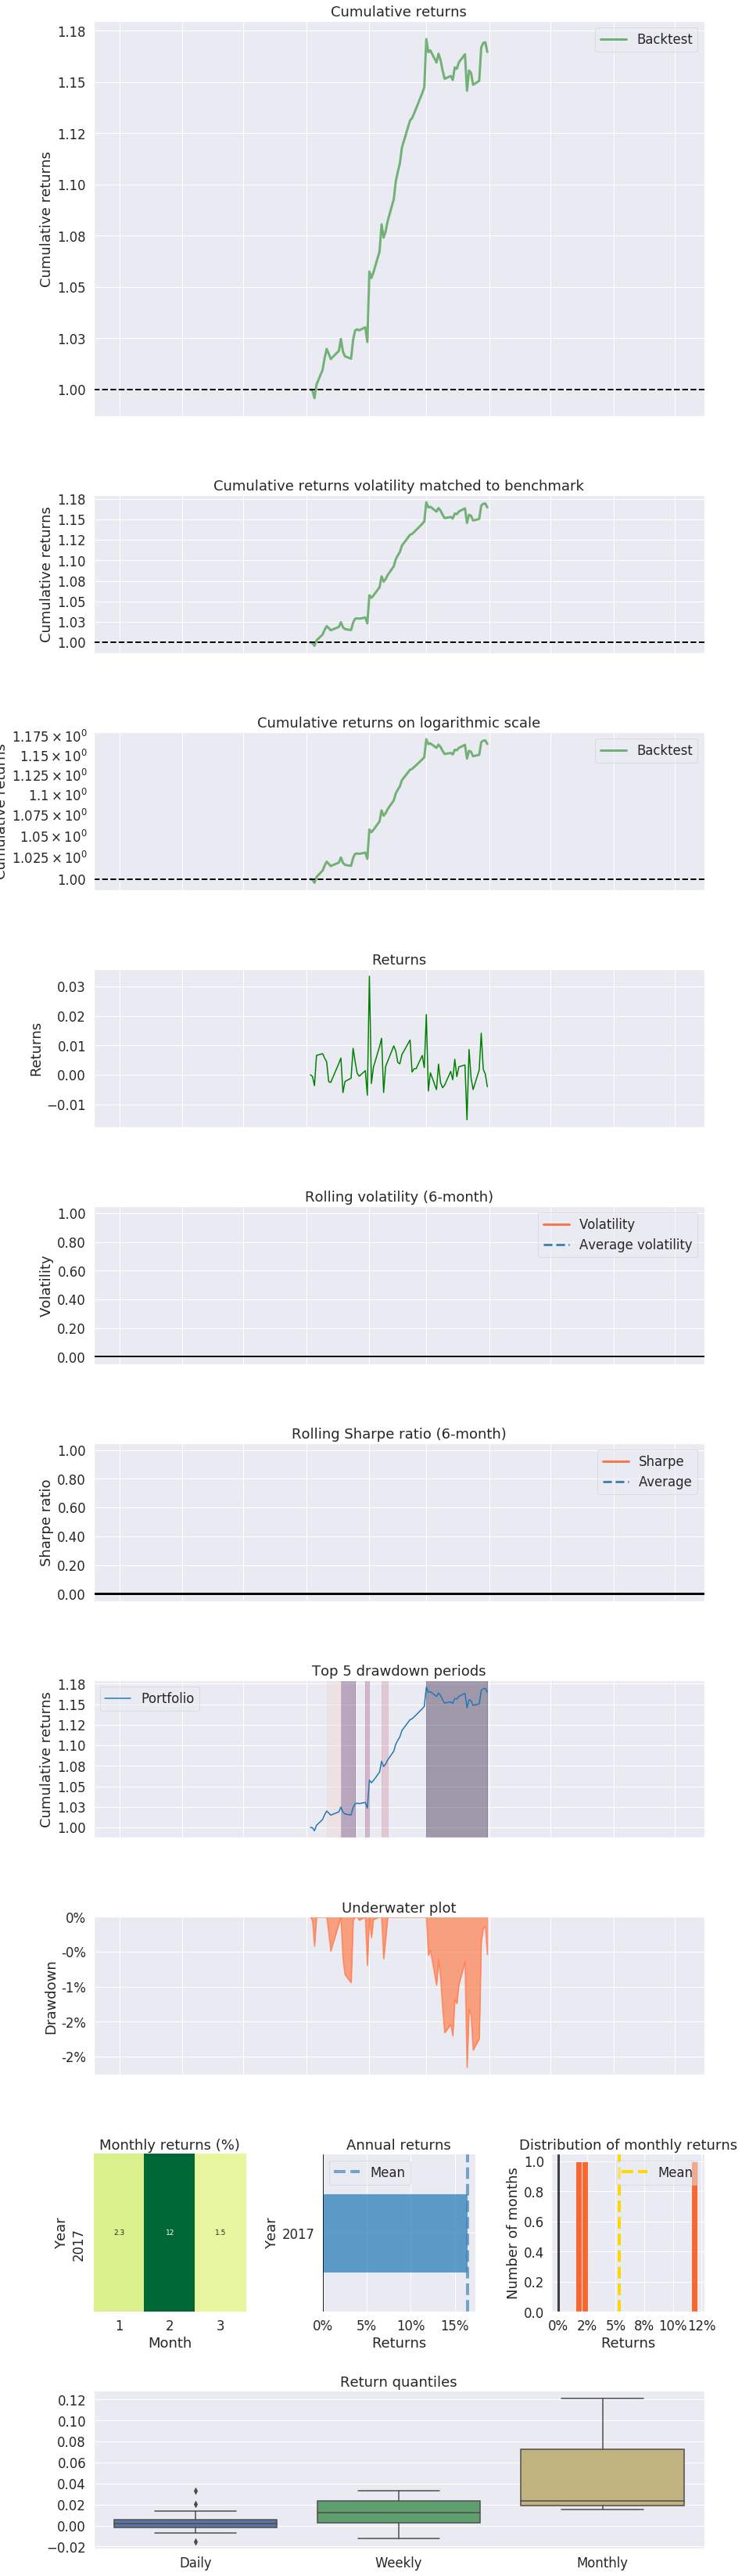

In [11]:

def initialize(context):
    # Which stocks to trade
    dji = [
        "AAPL",
        "AXP",
        "BA",
        "CAT",
    ]
    
    context.universe = [symbol(s) for s in dji]      # Make symbol list from tickers    
    context.history_window = 20  # History window
    
    # Size of our portfolio
    context.stocks_to_hold = 2
    
    # Schedule the daily trading routine for once per month
    schedule_function(handle_data, date_rules.month_start(), time_rules.market_close())    
    
def month_perf(ts):
    perf = (ts[-1] / ts[0]) - 1
    return perf
    
def handle_data(context, data):
    # Get history for all the stocks.
    hist = data.history(context.universe, "close", context.history_window, "1d")
    # dataframe of the 20 day window ending in 2017-01-01(2017-01-01) for our 4 stocks
    # for the 4 stocks in dji
    
    print('-----------HANDLE DATA CALLED--------')
    print(f'type(hist):{type(hist)}')
    print(hist)
    
    
    # This creates a table of percent returns, in order.
    perf_table = hist.apply(month_perf).sort_values(ascending=False)
    print(f'----perf_table--\n{perf_table}')
    # Perf table for our 4 stocks above, based on our month
    #     Equity(8 [AAPL])     0.064522
    #     Equity(290 [AXP])    0.046092
    #     Equity(298 [BA])     0.031611
    #     Equity(482 [CAT])   -0.004870

    # Make buy list of the top N stocks
    buy_list = perf_table[:context.stocks_to_hold]
    print(f'------buy_list--\n:{buy_list}')
    # :Equity(8 [AAPL])     0.064522
    # Equity(290 [AXP])    0.046092
    
    # The rest will not be held.
    the_rest = perf_table[context.stocks_to_hold:]
    print(f'------the_rest--\n:{the_rest}')
    # :Equity(298 [BA])     0.031611
    # Equity(482 [CAT])   -0.004870
    
    # Place target buy orders for top N stocks.
    for stock, perf in buy_list.iteritems():
        stock_weight = 1 / context.stocks_to_hold

        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, stock_weight)

    # Make sure we are flat the rest.
    for stock, perf in the_rest.iteritems():
        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, 0.0)     
            
def analyze(context, perf):
    # Use PyFolio to generate a performance report
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.create_returns_tear_sheet(returns, benchmark_rets=None)
    

# Set start and end date
start = datetime(2017, 1, 1, tzinfo=pytz.UTC)
end = datetime(2017, 4, 1, tzinfo=pytz.UTC)

# Fire off the backtest
result = run_algorithm(
    start=start, 
    end=end, 
    initialize=initialize, 
    analyze=analyze, 
    capital_base=10000, 
    data_frequency = 'daily', 
    bundle='quandl' 
)


/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


/Users/vikram/.local/share/virtualenvs/py_exercise_zipline-uzGlEK1n/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return bound(*args, **kwds)


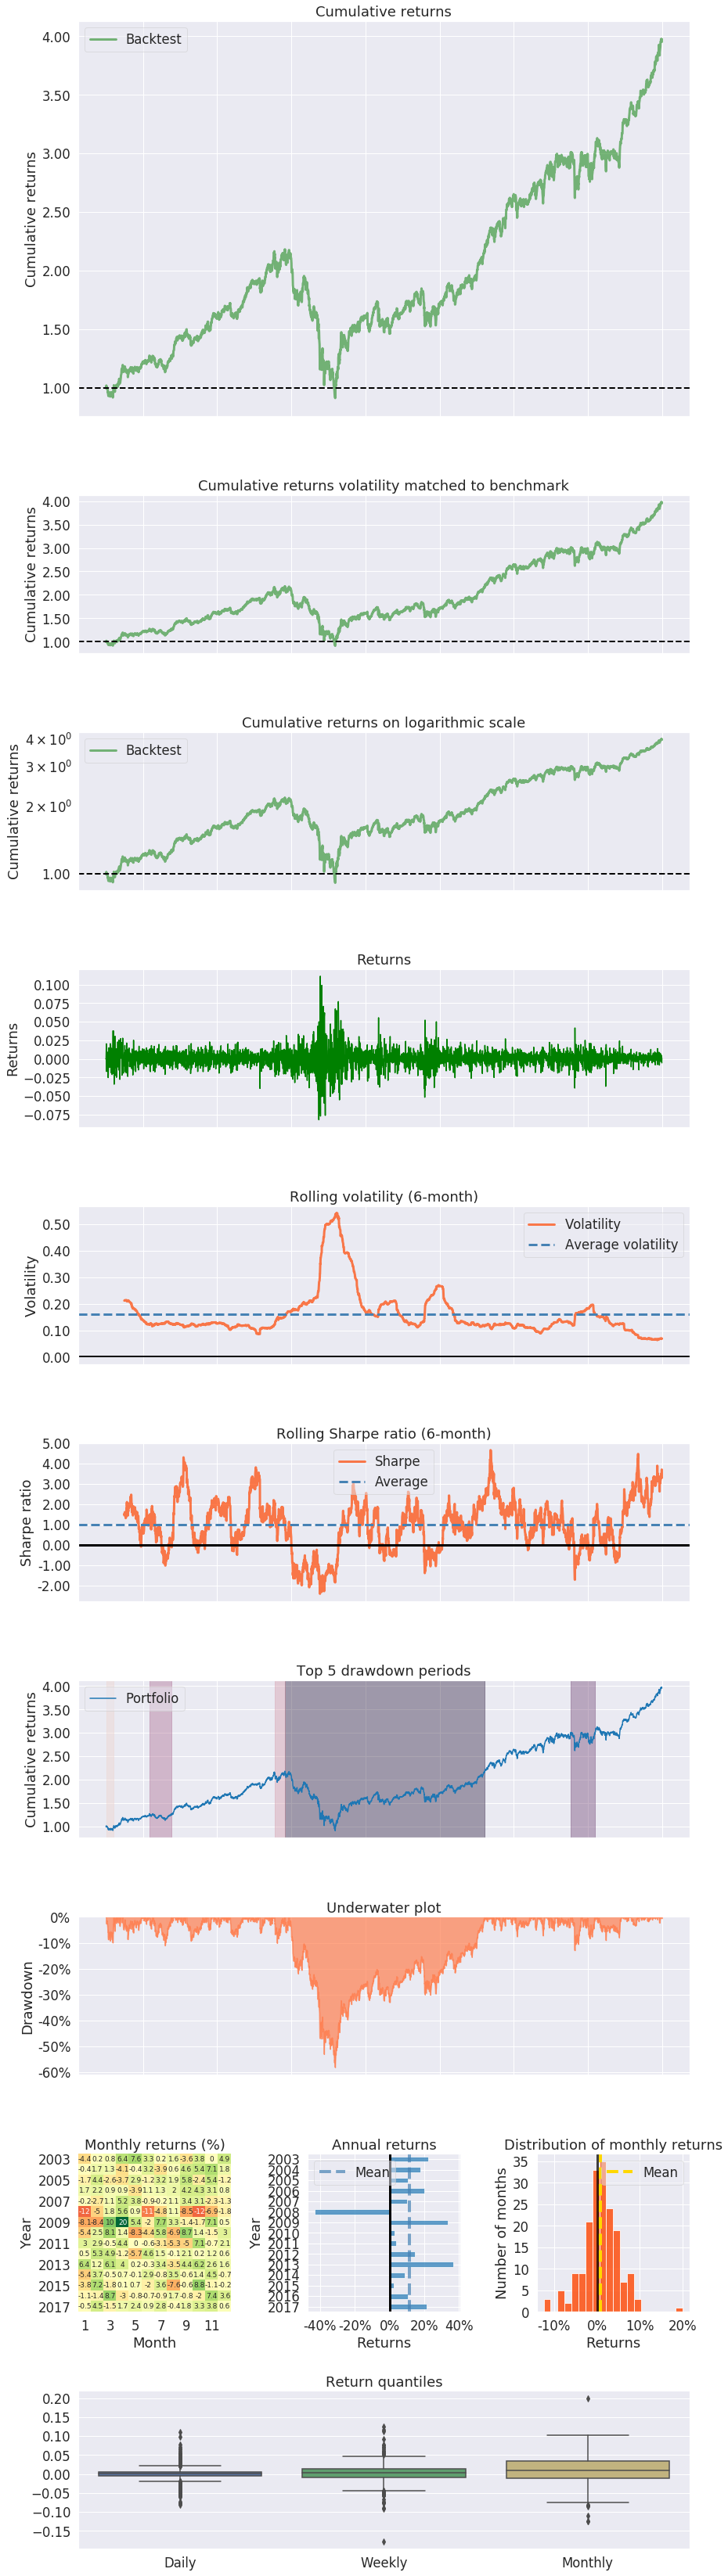

In [17]:

def initialize(context):
    # Which stocks to trade
    dji = [
        "AAPL",
        "AXP",
        "BA",
        "CAT",
        "CSCO",
        "CVX",
        "DIS",
        "DWDP",
        "GS",
        "HD",
        "IBM",
        "INTC",
        "JNJ",
        "JPM",
        "KO",
        "MCD",
        "MMM",
        "MRK",
        "MSFT",
        "NKE",
        "PFE",
        "PG",
        "TRV",
        "UNH",
        "UTX",
        "V",
        "VZ",
        "WBA",
        "WMT",
        "XOM",  
    ]
    
    # Make symbol list from tickers
    context.universe = [symbol(s) for s in dji]
    
    # History window
    context.history_window = 20
    
    # Size of our portfolio
    context.stocks_to_hold = 10
    
    # Schedule the daily trading routine for once per month
    schedule_function(handle_data, date_rules.month_start(), time_rules.market_close())    
    
def month_perf(ts):
    perf = (ts[-1] / ts[0]) - 1
    return perf
    
def handle_data(context, data):
    # Get history for all the stocks.
    hist = data.history(context.universe, "close", context.history_window, "1d")
    
    # This creates a table of percent returns, in order.
    perf_table = hist.apply(month_perf).sort_values(ascending=False)

    # Make buy list of the top N stocks
    buy_list = perf_table[:context.stocks_to_hold]
    
    # The rest will not be held.
    the_rest = perf_table[context.stocks_to_hold:]
    
    # Place target buy orders for top N stocks.
    for stock, perf in buy_list.iteritems():
        stock_weight = 1 / context.stocks_to_hold

        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, stock_weight)

    # Make sure we are flat the rest.
    for stock, perf in the_rest.iteritems():
        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, 0.0)     
            
def analyze(context, perf):
    # Use PyFolio to generate a performance report
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.create_returns_tear_sheet(returns, benchmark_rets=None)
    

# Set start and end date
start = datetime(2003, 1, 1, tzinfo=pytz.UTC)
end = datetime(2017, 12, 31, tzinfo=pytz.UTC)

# Fire off the backtest
result = run_algorithm(
    start=start, 
    end=end, 
    initialize=initialize, 
    analyze=analyze, 
    capital_base=10000, 
    data_frequency = 'daily', 
    bundle='quandl' 
)


In [12]:
result.shape

(62, 37)

In [13]:
result

algo_volatility  algorithm_period_return alpha  \
2017-01-03 00:00:00+00:00              NaN                 0.000000  None   
2017-01-04 00:00:00+00:00         0.005747                -0.000512  None   
2017-01-05 00:00:00+00:00         0.031542                -0.004179  None   
2017-01-06 00:00:00+00:00         0.068531                 0.002401  None   
2017-01-09 00:00:00+00:00         0.075590                 0.009619  None   
2017-01-10 00:00:00+00:00         0.071845                 0.015349  None   
2017-01-11 00:00:00+00:00         0.066518                 0.019817  None   
2017-01-12 00:00:00+00:00         0.067951                 0.017469  None   
2017-01-13 00:00:00+00:00         0.068350                 0.014850  None   
2017-01-17 00:00:00+00:00         0.065458                 0.018846  None   
2017-01-18 00:00:00+00:00         0.064771                 0.024677  None   
2017-01-19 00:00:00+00:00         0.072435                 0.018494  None   
2017-01-20 00:00:00+00:00         0.071324                 0.016206  None   
2017-01-23 00:00:00+00:00         0.069280                 0.015032  None   
2017-01-24 00:00:00+00:00         0.074291                 0.024195  None   
2017-01-25 00:00:00+00:00         0.072711                 0.028844  None   
2017-01-26 00:00:00+00:00         0.070574                 0.029366  None   
2017-01-27 00:00:00+00:00         0.068953                 0.028881  None   
2017-01-30 00:00:00+00:00         0.067014                 0.030343  None   
2017-01-31 00:00:00+00:00         0.071891                 0.023199  None   
2017-02-01 00:00:00+00:00         0.132292                 0.057527  None   
2017-02-02 00:00:00+00:00         0.130515                 0.054403  None   
2017-02-03 00:00:00+00:00         0.127515                 0.057161  None   
2017-02-06 00:00:00+00:00         0.126838                 0.067294  None   
2017-02-07 00:00:00+00:00         0.127923                 0.080571  None   
2017-02-08 00:00:00+00:00         0.128513                 0.074105  None   
2017-02-09 00:00:00+00:00         0.126018                 0.077205  None   
2017-02-10 00:00:00+00:00         0.123785                 0.082185  None   
2017-02-13 00:00:00+00:00         0.123298                 0.092859  None   
2017-02-14 00:00:00+00:00         0.121993                 0.101629  None   
...                                    ...                      ...   ...   
2017-02-17 00:00:00+00:00         0.116592                 0.118041  None   
2017-02-21 00:00:00+00:00         0.117081                 0.131277  None   
2017-02-22 00:00:00+00:00         0.115574                 0.132359  None   
2017-02-23 00:00:00+00:00         0.113980                 0.134723  None   
2017-02-24 00:00:00+00:00         0.112447                 0.137125  None   
2017-02-27 00:00:00+00:00         0.111203                 0.144627  None   
2017-02-28 00:00:00+00:00         0.109768                 0.147439  None   
2017-03-01 00:00:00+00:00         0.116410                 0.170975  None   
2017-03-02 00:00:00+00:00         0.117319                 0.164545  None   
2017-03-03 00:00:00+00:00         0.116115                 0.165397  None   
2017-03-06 00:00:00+00:00         0.116640                 0.159549  None   
2017-03-07 00:00:00+00:00         0.115276                 0.163793  None   
2017-03-08 00:00:00+00:00         0.114877                 0.160713  None   
2017-03-09 00:00:00+00:00         0.115024                 0.155625  None   
2017-03-10 00:00:00+00:00         0.114814                 0.151573  None   
2017-03-13 00:00:00+00:00         0.113664                 0.152945  None   
2017-03-14 00:00:00+00:00         0.112966                 0.151039  None   
2017-03-15 00:00:00+00:00         0.111938                 0.157149  None   
2017-03-16 00:00:00+00:00         0.111094                 0.156451  None   
2017-03-17 00:00:00+00:00         0.110000                 0.159623  None   
2017-03-20 00:00:00+00:

In [9]:
# Checking what columns are in the results dataframe
for column in result:
    print(column)


algo_volatility
algorithm_period_return
alpha
benchmark_period_return
benchmark_volatility
beta
capital_used
ending_cash
ending_exposure
ending_value
excess_return
gross_leverage
long_exposure
long_value
longs_count
max_drawdown
max_leverage
net_leverage
orders
period_close
period_label
period_open
pnl
portfolio_value
positions
returns
sharpe
short_exposure
short_value
shorts_count
sortino
starting_cash
starting_exposure
starting_value
trading_days
transactions
treasury_period_return


In [15]:
# Inspecting the first days' exposure
result.gross_leverage.head()

2003-01-02 00:00:00+00:00    0.000000
2003-01-03 00:00:00+00:00    0.979854
2003-01-06 00:00:00+00:00    0.980255
2003-01-07 00:00:00+00:00    0.980056
2003-01-08 00:00:00+00:00    0.979711
Name: gross_leverage, dtype: float64

In [18]:
# Get the backtest data for a particular day
result.loc['2010-11-17']

algo_volatility                                                     0.214788
algorithm_period_return                                               0.5992
alpha                                                                   None
benchmark_period_return                                                    0
benchmark_volatility                                                       0
beta                                                                    None
capital_used                                                               0
ending_cash                                                          494.665
ending_exposure                                                      15497.3
ending_value                                                         15497.3
excess_return                                                              0
gross_leverage                                                      0.969068
long_exposure                                                        15497.3

In [20]:
# Let's get a portfolio snapshot
# Import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Select day to view
day = '2009-03-17'

# Get portfolio value and positions for this day
port_value = result.loc[day,'portfolio_value']
day_positions = result.loc[day,'positions']


print(f'----port_value------:{port_value}')
print(f'----day_positions---:{day_positions}')

----port_value------:10611.947243499992
----day_positions---:[{'sid': Equity(1264 [GS]), 'amount': 12, 'cost_basis': 88.82555666666667, 'last_sale_price': 98.99000000000001}, {'sid': Equity(1441 [IBM]), 'amount': 11, 'cost_basis': 86.86466874125873, 'last_sale_price': 92.91}, {'sid': Equity(8 [AAPL]), 'amount': 11, 'cost_basis': 93.02758090909091, 'last_sale_price': 99.66}, {'sid': Equity(1615 [KO]), 'amount': 25, 'cost_basis': 43.342699999999994, 'last_sale_price': 41.45}, {'sid': Equity(2979 [V]), 'amount': 17, 'cost_basis': 54.38818, 'last_sale_price': 55.29}, {'sid': Equity(3105 [WMT]), 'amount': 20, 'cost_basis': 47.40469, 'last_sale_price': 50.0}, {'sid': Equity(705 [CSCO]), 'amount': 67, 'cost_basis': 14.398195000000001, 'last_sale_price': 16.14}, {'sid': Equity(1321 [HD]), 'amount': 48, 'cost_basis': 18.900445, 'last_sale_price': 21.48}, {'sid': Equity(2857 [TRV]), 'amount': 27, 'cost_basis': 34.768375000000006, 'last_sale_price': 40.17}, {'sid': Equity(1496 [INTC]), 'amount': 

In [43]:
# Empty DataFrame to store values
df = pd.DataFrame(columns=['value', 'pnl'])

# Populate DataFrame with position info
for pos in day_positions:
    ticker = pos['sid'].symbol 
    df.loc[ticker,'value'] = pos['amount'] * pos['last_sale_price']
    df.loc[ticker,'pnl'] =  df.loc[ticker,'value'] - (pos['amount'] * pos['cost_basis'])

print(f'-----df:\n{df}')
print(f'------df[\'value\'].sum():  {df["value"].sum()}')
print(df["value"].sum() - port_value)

-----df:
        value      pnl
GS    1187.88  121.973
IBM   1022.01  66.4986
AAPL  1096.26  72.9566
KO    1036.25 -47.3175
V      939.93  15.3309
WMT      1000  51.9062
CSCO  1081.38  116.701
HD    1031.04  123.819
TRV   1084.59  145.844
INTC   1162.2  203.803
------df['value'].sum():  10641.54
29.592756500009273


In [44]:
print('----port_value:{port_value}')
# Add cash position
df.loc['cash', ['value','pnl']] = [(port_value - df['value'].sum()), 0]
print(f'-----df:\n{df}')

----port_value:{port_value}
-----df:
        value      pnl
GS    1187.88  121.973
IBM   1022.01  66.4986
AAPL  1096.26  72.9566
KO    1036.25 -47.3175
V      939.93  15.3309
WMT      1000  51.9062
CSCO  1081.38  116.701
HD    1031.04  123.819
TRV   1084.59  145.844
INTC   1162.2  203.803
cash -29.5928        0


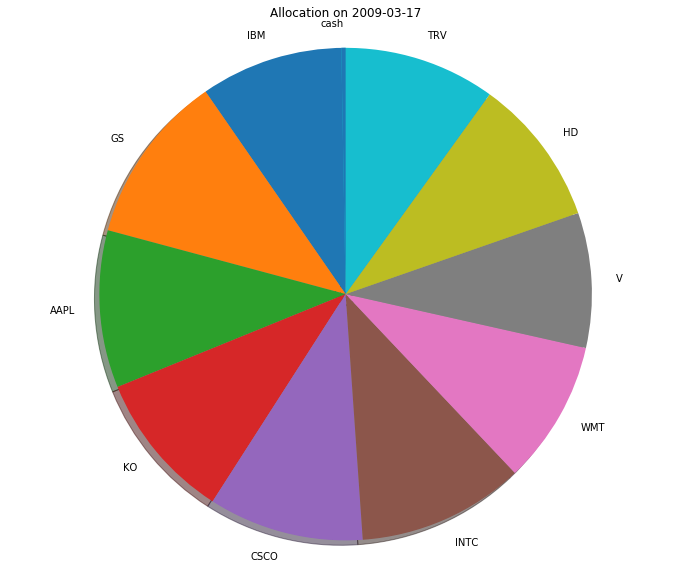

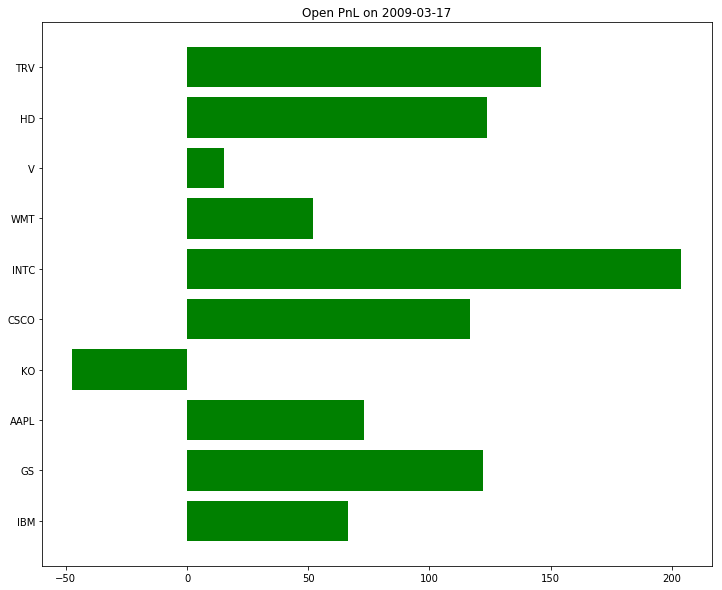

In [21]:



    

# Make pie chart for allocations
fig, ax1 = plt.subplots(figsize=[12, 10])
ax1.pie(df['value'], labels=df.index, shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Allocation on {}'.format(day))
plt.show()

# Make bar chart for open PnL
fig, ax1 = plt.subplots(figsize=[12, 10])
pnl_df = df.drop('cash')
ax1.barh( pnl_df.index, pnl_df['pnl'],  align='center', color='green', ecolor='black')
ax1.set_title('Open PnL on {}'.format(day))
plt.show()


In [38]:
df

value      pnl
GS    1187.88  121.973
IBM   1022.01  66.4986
AAPL  1096.26  72.9566
KO    1036.25 -47.3175
V      939.93  15.3309
WMT      1000  51.9062
CSCO  1081.38  116.701
HD    1031.04  123.819
TRV   1084.59  145.844
INTC   1162.2  203.803
cash -29.5928        0

In [41]:
# Custom Time Series Analysis

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt, rc, ticker

# Format for book image
font = {'family' : 'eurostile',
        'weight' : 'normal',
        'size'   : 16}
rc('font', **font)

# Copy the columns we need
df = result.copy().filter(items=['portfolio_value', 'gross_leverage'])
print(df.head())
print(df.shape)

                           portfolio_value  gross_leverage
2003-01-02 00:00:00+00:00     10000.000000        0.000000
2003-01-03 00:00:00+00:00      9994.870241        0.979854
2003-01-06 00:00:00+00:00     10197.763241        0.980255
2003-01-07 00:00:00+00:00     10096.023241        0.980056
2003-01-08 00:00:00+00:00      9924.393241        0.979711
(3776, 2)


In [45]:
# Settings
calc_window = 126
year_length = 252

# Function for annualized return
def ann_ret(ts):
    return np.power((ts[-1] / ts[0]), (year_length/len(ts))) -1  

# Function for drawdown
def dd(ts):
    return np.min(ts / np.maximum.accumulate(ts)) - 1

# Get a rolling window
rolling_window = result.portfolio_value.rolling(calc_window)
print(type(rolling_window))
print(rolling_window)


<class 'pandas.core.window.Rolling'>
Rolling [window=126,center=False,axis=0]


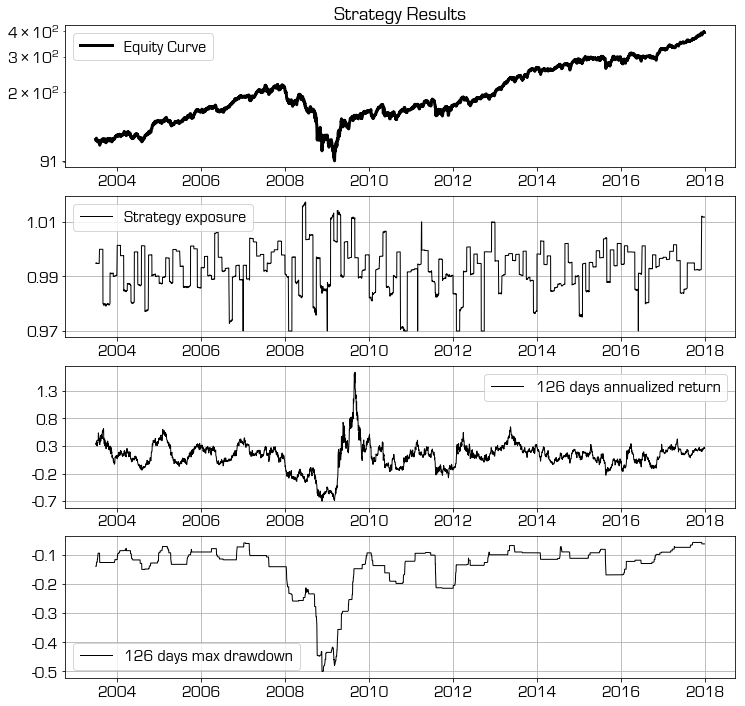

In [41]:


# Calculate rolling analytics
df['annualized'] = rolling_window.apply(ann_ret)
df['drawdown'] = rolling_window.apply(dd)

# Drop initial n/a values
df.dropna(inplace=True)

# Make a figure
fig = plt.figure(figsize=(12, 12))

# Make the base lower, just to make the graph easier to read
df['portfolio_value'] /= 100

# First chart
ax = fig.add_subplot(411)
ax.set_title('Strategy Results')
ax.plot(df['portfolio_value'], 
        linestyle='-', 
        color='black',
        label='Equity Curve', linewidth=3.0)

# Set log scale
ax.set_yscale('log') 

# Make the axis look nicer
ax.yaxis.set_ticks(np.arange(df['portfolio_value'].min(), df['portfolio_value'].max(), 500 ))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0f'))

# Add legend and grid
ax.legend()
ax.grid(False)

# Second chart
ax = fig.add_subplot(412)
ax.plot(df['gross_leverage'], 
        label='Strategy exposure'.format(calc_window), 
        linestyle='-', 
        color='black',
        linewidth=1.0)

# Make the axis look nicer
ax.yaxis.set_ticks(np.arange(df['gross_leverage'].min(), df['gross_leverage'].max(), 0.02 ))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Add legend and grid
ax.legend()
ax.grid(True)

# Third chart
ax = fig.add_subplot(413)
ax.plot(df['annualized'], 
        label='{} days annualized return'.format(calc_window), 
        linestyle='-', 
        color='black',
        linewidth=1.0)

# Make the axis look nicer
ax.yaxis.set_ticks(np.arange(df['annualized'].min(), df['annualized'].max(), 0.5 ))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

# Add legend and grid
ax.legend()
ax.grid(True)

# Fourth chart
ax = fig.add_subplot(414)
ax.plot(df['drawdown'], 
        label='{} days max drawdown'.format(calc_window), 
        linestyle='-', 
        color='black',
        linewidth=1.0)

# Make the axis look nicer
ax.yaxis.set_ticks(np.arange(df['drawdown'].min(), df['drawdown'].max(), 0.1 ))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

# Add legend and grid
ax.legend()
ax.grid(True)
